In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
d = pd.read_csv('avocado.csv')
d = d.drop('Unnamed: 0', axis=1)

In [5]:
d['Date'] = pd.to_datetime(d['Date'])
d['month'] = d['Date'].dt.month
d['year'] = d['Date'].dt.year
m = d.groupby(['year','month']).mean().reset_index()

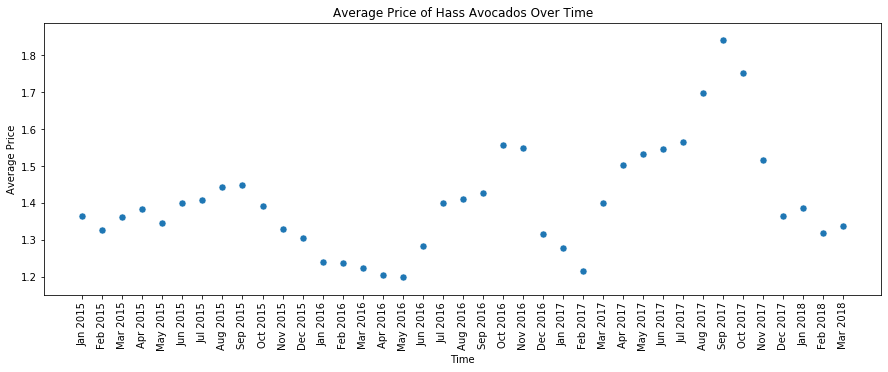

In [6]:
# Average price over time

fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x=m.index.values, y='AveragePrice', data=m, s=50)
plt.title('Average Price of Hass Avocados Over Time')
xxx = ['Jan 2015','Feb 2015','Mar 2015','Apr 2015','May 2015','Jun 2015','Jul 2015','Aug 2015','Sep 2015','Oct 2015','Nov 2015','Dec 2015','Jan 2016','Feb 2016','Mar 2016','Apr 2016','May 2016','Jun 2016','Jul 2016','Aug 2016','Sep 2016','Oct 2016','Nov 2016','Dec 2016','Jan 2017','Feb 2017','Mar 2017','Apr 2017','May 2017','Jun 2017','Jul 2017','Aug 2017','Sep 2017','Oct 2017','Nov 2017','Dec 2017','Jan 2018','Feb 2018','Mar 2018']
ax.set_xlabel('Time')
plt.xticks(ticks=range(39), labels=xxx, rotation=90)
ax.set_ylabel('Average Price')
plt.show()

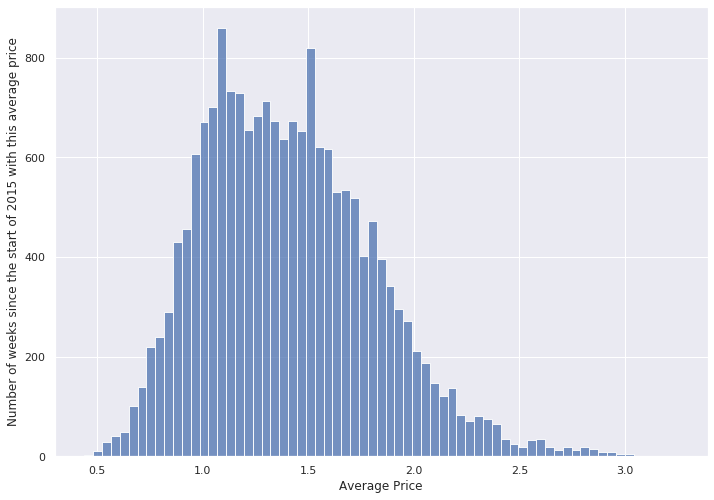

In [8]:
# Histogram of average price

sns.color_palette("tab10")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ff = sns.histplot(data=d['AveragePrice'])
ff.set_xlabel('Average Price')
ff.set_ylabel('Number of weeks since the start of 2015 with this average price')
plt.show()

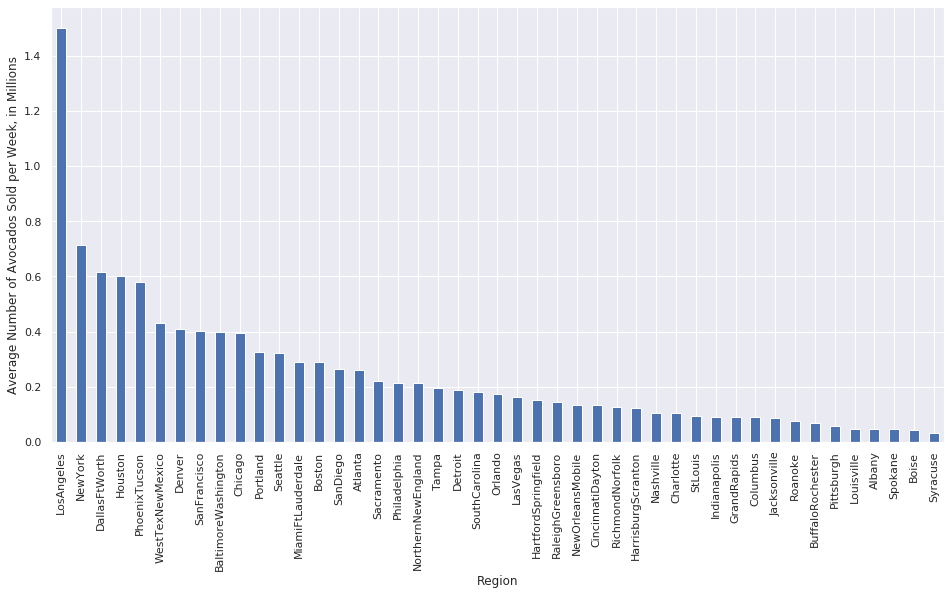

In [11]:
# Bar chart of sales by region

f = d[['region','Total Volume']].groupby(['region']).mean().sort_values('Total Volume', ascending=False)/1000000
# Remove overlapping regions; some are larger because they are conglomerates of many other regions
f = f.drop(['TotalUS','West','SouthCentral','Northeast','Southeast','GreatLakes','Midsouth','Plains','California'])

fig = f.plot.bar(figsize=(16,8))
fig.set_xlabel('Region')
fig.set_ylabel('Average Number of Avocados Sold per Week, in Millions')
fig.get_legend().remove()
plt.show()